## NACA 0012 Airfoil

In [2]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [29]:
N = 51
x_start, x_end = -1.0,2.0
y_start, y_end = -0.5,0.5
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y) 

In [30]:
#set freestream speed
u_inf = 1.0

v_freestream = numpy.zeros((N, N), dtype=float)
u_freestream = u_inf * numpy.ones((N, N), dtype=float)

#psi of freestream
psi_freestream = u_inf * Y

In [71]:
#load text files for NACA0012
sigma = numpy.loadtxt('NACA0012_sigma.txt', dtype = float)
foil_y = numpy.loadtxt('NACA0012_y.txt', dtype = float)
foil_x = numpy.loadtxt('NACA0012_x.txt', dtype = float)

In [72]:
def get_velocity(strength, xs, ys, X, Y):
    
    u = strength / (2 * numpy.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * numpy.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

In [73]:
def get_stream_function(strength, xs, ys, X, Y):
    psi = strength / (2*numpy.pi)*numpy.arctan2((Y-ys),(X-xs))
    
    return psi

In [74]:
u = numpy.zeros((51,51), dtype = float)
v = numpy.zeros((51,51), dtype = float)
psi = numpy.zeros((51,51), dtype = float)

#psi = numpy.zeros(len(sigma), dtype = float)

In [96]:
for i in range(0,len(sigma)):
    
    #finding velocity field
    u_source, v_source = get_velocity(sigma[i], foil_x[i], foil_y[i], X, Y)
    
    #find stream function
    psi_source = get_stream_function(sigma[i], foil_x[i], foil_y[i], X, Y)
    
    u = u + u_source
    v = v + v_source
    psi = psi + psi_source

In [97]:
u = u + u_freestream
v = v + v_freestream
psi = psi + psi_freestream

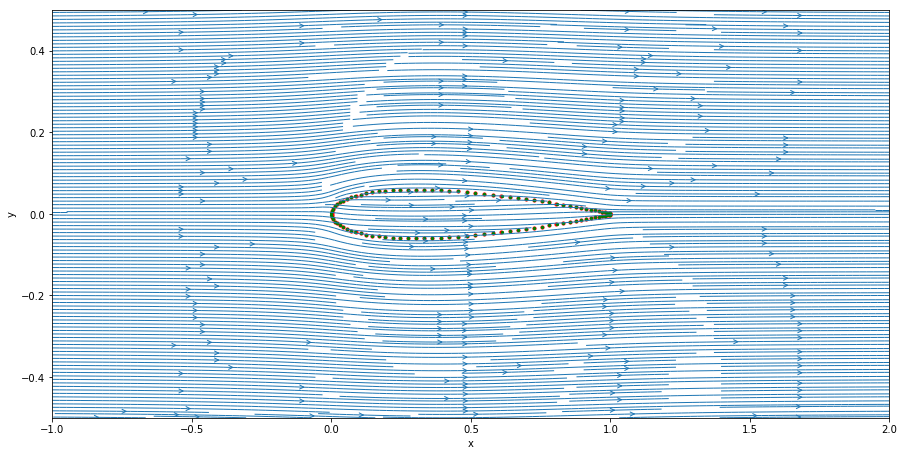

In [98]:
#plot
width = 15
height = (y_end - y_start)*1.5 / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=4, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(foil_x, foil_y, color='r', s=10, marker='o')

# calculate the stagnation points
x_stagnation = foil_x - sigma / (2 * numpy.pi * u_inf)
y_stagnation = foil_y
# display the stagnation points
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=5, marker='o');

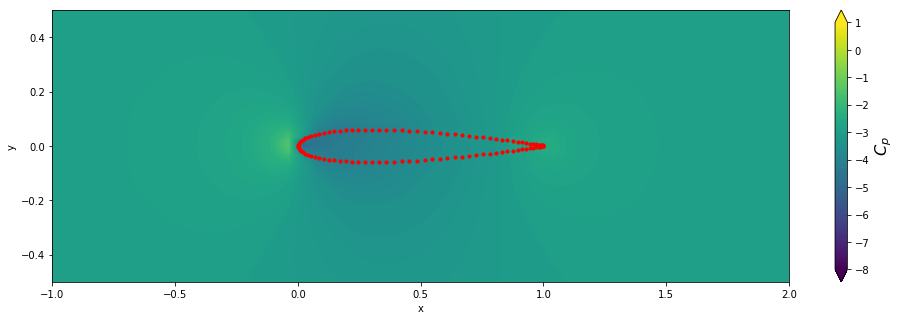

In [110]:
# compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 15
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-8.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-8.0,-7.0,-6.0,-5.0,-4.0,-3.0,-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(foil_x, foil_y,
               color='r', s=10, marker='o');

In [101]:
numpy.argmax(cp)

1291

In [102]:
cp.shape

(51, 51)